# Practical work 6 : Harris Corner Detector

The goal of this pratical work is to implement the Harris-Stephen's corners detector (C. Harris and M. Stephens. A combined corner and edge detector. In Proc. Fourth Alvey Vision Conference, pages 147–151, 1988).

Recall the Harris detector computes a map of corners from an image $I$:
$$
R(x,y) = \operatorname{det}(M) - k (\operatorname{trace}(M))^2, (x,y) \text{pixels}
$$
with $k\in[0.04, 0.06]$. $M$ is the auto-correlation of image $I$:
$$
M=\begin{pmatrix}
\sum_{x,y \in W} w(x,y)I_x^2 &
\sum_{x,y \in W} w(x,y)I_xI_y \\
\sum_{x,y \in W} w(x,y)I_xI_y &
\sum_{x,y \in W} w(x,y)I_y^2 
\end{pmatrix}
=\begin{pmatrix}
A & B \\ C & D
\end{pmatrix}
$$
with $w(x,y)=\frac1{2\pi \sigma^2}e^{\frac{(x-x_c)^2 + (y-y_c)^2}{2\sigma^2}}$ a Gaussian mask centered on the window $W$. Partial derivatives $I_x$ and $I_y$ are estimated by one of the following kernels :
- Gradient:  $G_x = \begin{pmatrix} 0 & 0 & 0\\ 1 & 0 &-1 \\ 0 & 0 & 0 \end{pmatrix}$,
 $G_y = G_x^T$
- Prewitt: $G_x = \begin{pmatrix} 1 & 0 & -1\\ 1 & 0 &-1 \\ 1 & 0 & -1 \end{pmatrix}$,
 $G_y = G_x^T$
- Sobel: $G_x = \begin{pmatrix} 1 & 0 & -1\\ 2 & 0 &-2 \\ 1 & 0 & -1 \end{pmatrix}$,
 $G_y = G_x^T$
 


In [2]:
# Load useful libraries
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
from scipy.signal import convolve2d

# Useful functions 
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = np.int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()

def imshow(I, title=None, size=500, axis=False):
    """ display an image, with title, size, and axis """
    plt.figure(figsize=(size//80, size//80))
    plt.gray()
    plt.imshow(I)
    if not axis: plt.axis('off')
    if title: plt.title(title)
    plt.show()

## Exercise 1: Harris response calculation

1) Write a function `computeR(I, scale, kappa)` that returns the Harris response $R$ from an image $I$ and a scale $scale$. You will use 5 steps:
- Computation of the directionnal derivate $I_x$ and $I_y$. Use the Sobel kernel.
- Computation of the products $I_x^2$, $I_y^2$, $I_x.I_y$.
- Computation of the convolution of $I_x^2$, $I_y^2$ and $I_x.I_y$ by a gaussian kernel of size N (use given function `gaussianKernel()`)
- Computation of $\operatorname{det}(M(x,y))$ and $\operatorname{trace}(M(x,y))$ for each pixel
- Computation of $R(x,y) = \operatorname{det}(M(x,y)) - k.(\operatorname{trace}(M(x,y)))^2$. You can use $k = 0.04$.

 You can compute the convolutions by using the ```scipy.signal.convolve2d``` function. 


In [3]:
def SobelDetector(I):
  """ Array*double -> Array """
  Sx,Sy = np.array([[1,0,-1],[2,0,-2],[1,0,-1]]), np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
  Ix,Iy = convolve2d(I,Sx,mode='same',boundary='symm'),convolve2d(I,Sy,mode='same',boundary='symm')

  return Ix,Iy

In [4]:
def computeR(image,scale,kappa):
    """ Array[n, m]*float*float->Array[n, m]
    """
    Ix,Iy = SobelDetector(image)
    Ix2,Iy2,IxIy = Ix**2,Iy**2,Ix*Iy
    # Ix2,Iy2,IxIy = Ix@Ix,Iy@Iy,Ix@Iy
    
    G = gaussianKernel(scale)
    Ix2_c = convolve2d(Ix2,G,mode='same',boundary='symm')
    Iy2_c = convolve2d(Iy2,G,mode='same',boundary='symm')
    IxIy_c = convolve2d(IxIy,G,mode='same',boundary='symm')
    
    k = 0.04
    # determinant
    detM = Ix2_c*Iy2_c - IxIy_c**2
    #trace
    traceM = Ix2_c + Iy2_c
    
    R = detM - k * traceM ** 2
    
    return R

In [5]:


# for x in range(kappa,image.shape[0]-kappa):
#     for y in range(kappa,image.shape[1]):
#         Sx = np.sum([Ix2_c[x-kappa:x+1+kappa, y-kappa:y+1+kappa]])
#         Sy = np.sum([Iy2_c[x-kappa:x+1+kappa, y-kappa:y+1+kappa]])
#         Sxy = np.sum([IxIy_c[x-kappa:x+1+kappa, y-kappa:y+1+kappa]])

# k = 0.04
# # determinant
# detM = Sx*Sy - Sxy**2
# #trace
# traceM = Sx + Sy

# R = detM - k * traceM ** 2

# return R

2) Write a script that displays the Harris response for the image ```img/house2.png``` along with the original image. Use a gaussian window of size $W=15$ pixels.

/var/folders/x7/bmqxr1zd3lxd_kcxxw9physr0000gn/T/ipykernel_799/4253767609.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n2 = np.int(np.ceil(3*sigma))


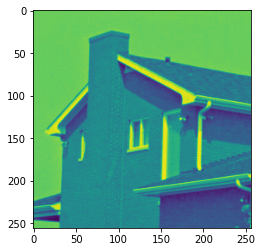

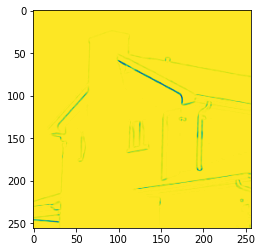

In [6]:
house2 = np.array(Image.open('img/house2.png'))
r_house2 = computeR(house2,0.3,15)
plt.imshow(house2)
plt.show()
plt.imshow(r_house2)

3) Write in a few lines an interpretation of the results, explaining how the Harris response allows to detect and discriminate homogeneous areas, edges and corners.

La méthode Harris nous permet de decter s'il y a une forte variation au tour de chaque pixel. Comme sur les contours et les coins il y a lieu des variations subites de couleurs, cela nous permet de les detecter, les contours et les coins.

## Exercise 2 : Harris corner detector
From the Harris response calculated at exercise 1, we will write all the functions needed for the Harris detector. Write the following functions: 

1) A function `thresholdR(R, thres)` that calculates and returns the binary thresholding $R_b$ of the response $R$ according to the threshold $thres$

In [7]:
def thresholdR(R, thres):
    """ Array[n, m] * float -> Array[n, m]
    """
    return np.where(R<thres,0,1)

2) A function `Rnms(R, Rbin)` that performs a non-maximum supression from the response $R$ and the binarized response $R_{bin}$. It returns the image $R_{locmax}$ (same size as $R$) =1 where $R_{bin}=1$ and the pixel has a greater value $R$ than its 8 nearest neighbors.

**Bonus**: Write a faster version of the script using Numpy function `np.roll()`.

In [8]:
ez = np.array([[1,2,3],[4,15,6],[7,8,9]])
ez = np.roll(ez,5)
ez.reshape(9)   # on applatit le tableau 2-D
if ez[0,0] > ez[1:].max(): # test maxima local strict
  print("maxima strict")
else:
  print("NON maxima strict")

maxima strict


In [9]:
def rnms(image_harris,image_harris_bin):
    """ Array[n, m] -> Array[n, m] 
    """
    Rlocm = np.zeros_like(image_harris)
    for i in range(1,Rlocm.shape[0] -1):
        for j in range(1,Rlocm.shape[1] -1):
            if image_harris_bin[i,j] == 1:
                ez = np.roll(image_harris[i-1:i+2,j-1:j+2],5)   # on remet l'element central à la première position
                ez.reshape(9)   # on applatit le tableau 2-D
                if ez[0,0] > ez[1:].max(): # test maxima local strict
                    Rlocm[i,j] = 1
    
    return Rlocm

3) Write a function ``cornerDetector(image, scale, kappa, thresh)`` that returns an array of the same size as the image. The array takes two values: 1 where a corner is detected and 0 elsewhere.

In [22]:
def cornerDetector(image, sigma, kappa, thres):
    """ Array[n, m]*float*float*float -> Array[n, m]
    """
    corner = np.zeros_like(image)
    R = computeR(image,sigma,kappa)
    Rbin = thresholdR(R,thres)
    Rm = rnms(R,Rbin)

    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if Rm[i,j] == 1 :  # un cote de contour
                corner[i,j] = 1
    
    return corner

4 ) Display the detected corners on the original image for the image ```img/house2.png```. Each detected corner will be displayed as a small red disk. You can use the functions ```np.nonzero()``` and ```plt.scatter()``` to that purpose.

/var/folders/x7/bmqxr1zd3lxd_kcxxw9physr0000gn/T/ipykernel_799/4253767609.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n2 = np.int(np.ceil(3*sigma))


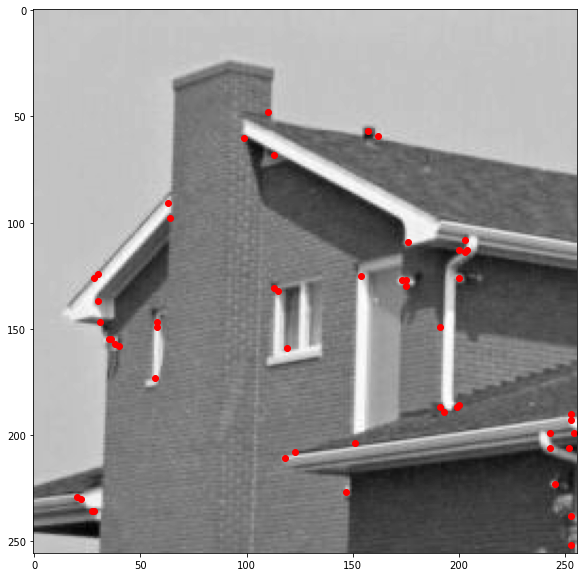

In [24]:
thres = r_house2.max() - 1e5
corner_house2 = cornerDetector(house2,0.33,15,thres)
plt.figure(figsize=(10,10))
plt.imshow(house2, cmap='gray')
plt.scatter(np.nonzero(corner_house2)[1],np.nonzero(corner_house2)[0], c='red')

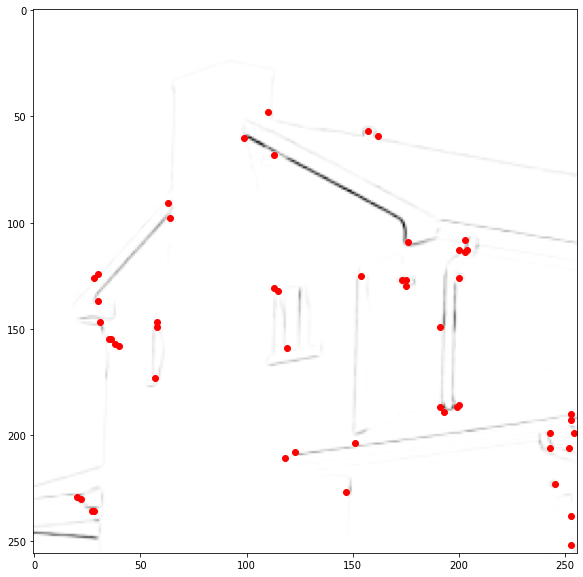

In [13]:

plt.figure(figsize=(10,10))
plt.imshow(r_house2, cmap='gray')
plt.scatter(np.nonzero(corner_house2)[1],np.nonzero(corner_house2)[0], c='red')

5) Evaluate the performances of the corner detector. Try to find good values for Sigma and Threshold.

La majeure partie des corners est détecté. Quelques uns ne le sont pas parcontre comme par exemple sur le toit de la maison.
Nous avons choisit un faible 0.33 pour pas trop lisser l'image et obtenir des frontieres épaisses et un seuil avec des valeurs proches du maximum. Avec une valeur petite la sensibilité augmente et on detecte des faux corners. Avec une valeur tres grande seuls quelques corners seront detectes.

## Exercise 3 : Properties of Harris corner detector

The goal of this exercice is to study some invariance properties of Harris detector.

1) Write a script that detects the corners on the images ```img/toyHorse1.png``` and ```img/toyHorse2.png``` with a scale of 15 and appropriate threshold value. Display the detected corners on the images.

/var/folders/x7/bmqxr1zd3lxd_kcxxw9physr0000gn/T/ipykernel_799/4253767609.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n2 = np.int(np.ceil(3*sigma))


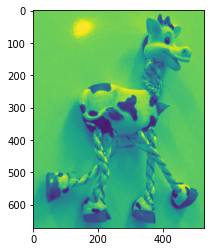

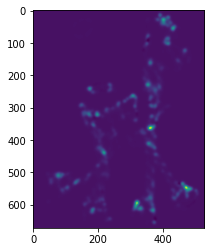

In [14]:
sig,kap = 5,5
toyHorse1 = np.array(Image.open('img/toyHorse1.png'))
r_toyHorse1 = computeR(toyHorse1,sig,kap)
plt.imshow(toyHorse1)
plt.show()
plt.imshow(r_toyHorse1)

In [15]:
np.quantile(r_toyHorse1,0.99)

131366311.79173344

/var/folders/x7/bmqxr1zd3lxd_kcxxw9physr0000gn/T/ipykernel_799/4253767609.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n2 = np.int(np.ceil(3*sigma))


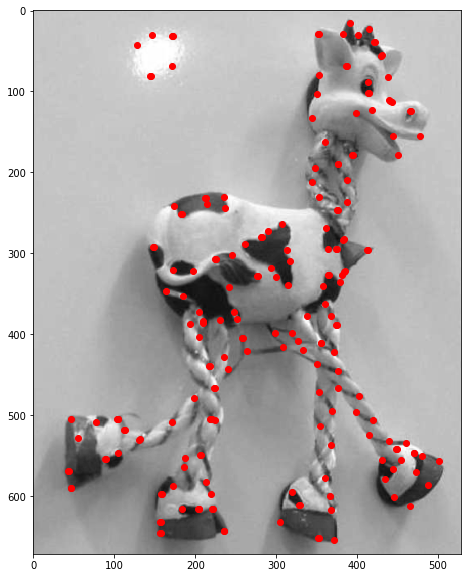

In [16]:
r_toyHorse1 = computeR(toyHorse1,sig,kap)
thres = r_toyHorse1.max() * 0.001
corner_toyHorse1 = cornerDetector(toyHorse1,sig,kap,thres)
plt.figure(figsize=(10,10))
plt.imshow(toyHorse1, cmap='gray')
plt.scatter(np.nonzero(corner_toyHorse1)[1],np.nonzero(corner_toyHorse1)[0], c='red')

/var/folders/x7/bmqxr1zd3lxd_kcxxw9physr0000gn/T/ipykernel_799/4253767609.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n2 = np.int(np.ceil(3*sigma))


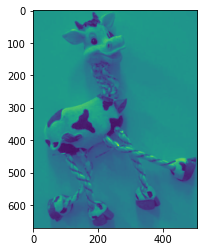

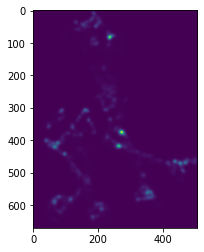

In [17]:
sig,kap = 5,5
toyHorse2 = np.array(Image.open('img/toyHorse2.png'))
r_toyHorse2 = computeR(toyHorse2,sig,kap)
plt.imshow(toyHorse2)
plt.show()
plt.imshow(r_toyHorse2)

/var/folders/x7/bmqxr1zd3lxd_kcxxw9physr0000gn/T/ipykernel_799/4253767609.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n2 = np.int(np.ceil(3*sigma))


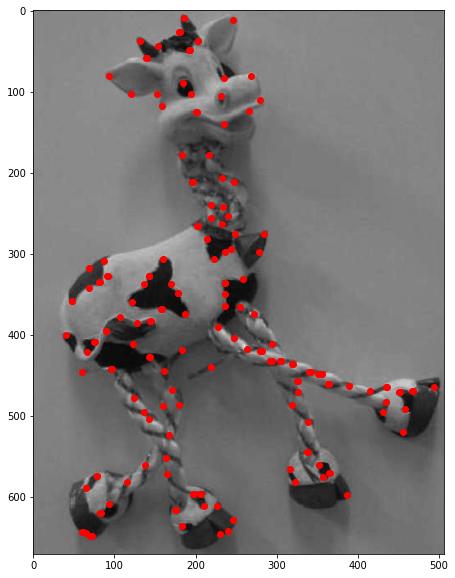

In [18]:
r_toyHorse2 = computeR(toyHorse2,sig,kap)
thres = r_toyHorse2.max() * 0.001
corner_toyHorse2 = cornerDetector(toyHorse2,sig,kap,thres)
plt.figure(figsize=(10,10))
plt.imshow(toyHorse2, cmap='gray')
plt.scatter(np.nonzero(corner_toyHorse2)[1],np.nonzero(corner_toyHorse2)[0], c='red')

2) What are the dynamic ranges of these two images ?

Your answer...

3) What are the transformations beetween the two images ?

Your answer...

4) Using a fixed threshold, is the detection invariant to rotation ? To affine transformation of brightness ?

Your Answer

/var/folders/x7/bmqxr1zd3lxd_kcxxw9physr0000gn/T/ipykernel_799/4253767609.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n2 = np.int(np.ceil(3*sigma))


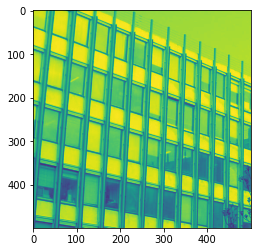

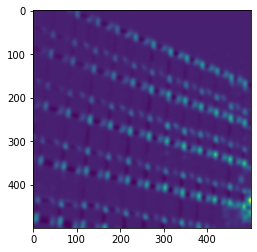

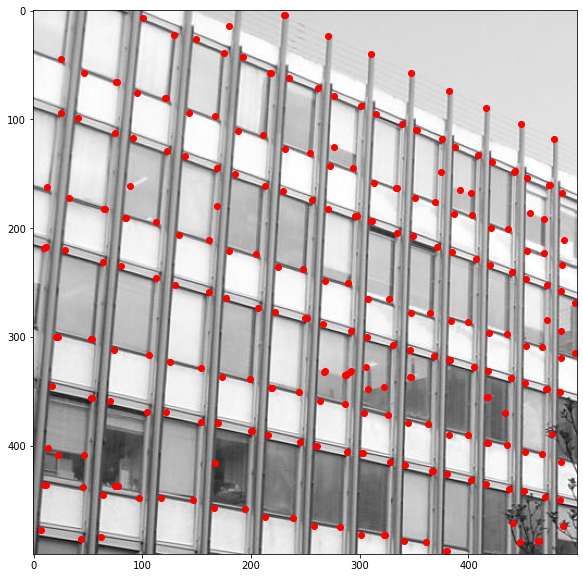

In [23]:
# Jussieu_wikipedia.jpg

sig,kap = 5,5
jussieu = np.array(Image.open('img/Jussieu_wikipedia.jpg'))
r_jussieu = computeR(jussieu,sig,kap)
plt.imshow(jussieu)
plt.show()
plt.imshow(r_jussieu)
plt.show()

r_jussieu = computeR(jussieu,sig,kap)
thres = r_jussieu.max() * 0.001
corner_jussieu = cornerDetector(jussieu,sig,kap,thres)
plt.figure(figsize=(10,10))
plt.imshow(jussieu, cmap='gray')
plt.scatter(np.nonzero(corner_jussieu)[1],np.nonzero(corner_jussieu)[0], c='red')

/var/folders/x7/bmqxr1zd3lxd_kcxxw9physr0000gn/T/ipykernel_799/4253767609.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n2 = np.int(np.ceil(3*sigma))


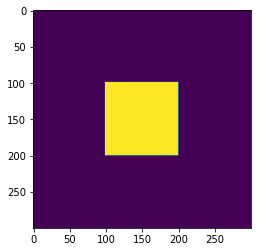

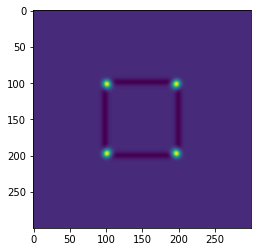

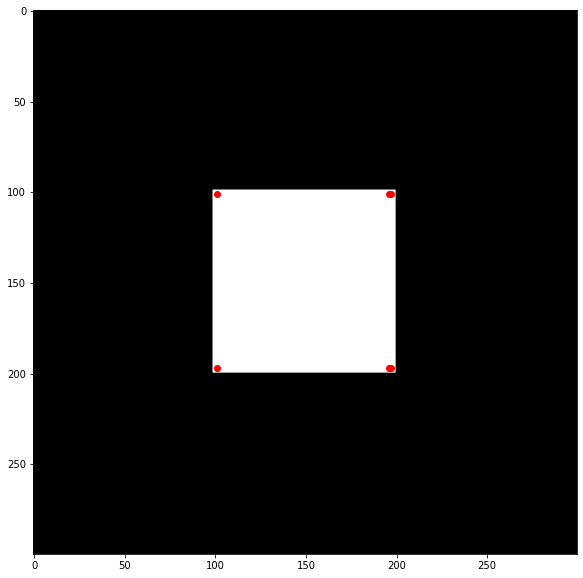

In [20]:
# rectangle.png

sig,kap = 5,5
rectangle = np.array(Image.open('img/rectangle.png'))
r_rectangle = computeR(rectangle,sig,kap)
plt.imshow(rectangle)
plt.show()
plt.imshow(r_rectangle)
plt.show()

r_rectangle = computeR(rectangle,sig,kap)
thres = r_rectangle.max() * 0.001
corner_rectangle = cornerDetector(rectangle,sig,kap,thres)
plt.figure(figsize=(10,10))
plt.imshow(rectangle, cmap='gray')
plt.scatter(np.nonzero(corner_rectangle)[1],np.nonzero(corner_rectangle)[0], c='red')

/var/folders/x7/bmqxr1zd3lxd_kcxxw9physr0000gn/T/ipykernel_799/4253767609.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n2 = np.int(np.ceil(3*sigma))


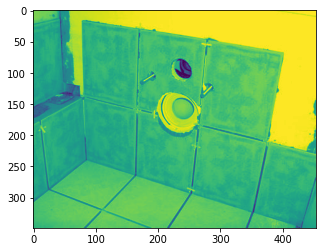

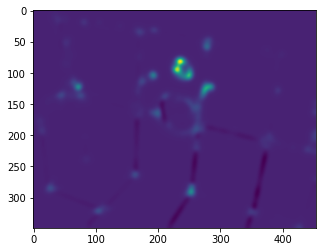

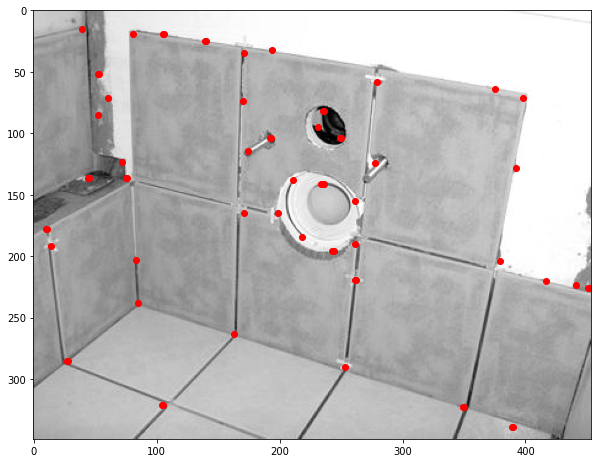

In [21]:
# carrelage_wikipedia.jpg

sig,kap = 5,5
carrelage = np.array(Image.open('img/carrelage_wikipedia.jpg'))
r_carrelage = computeR(carrelage,sig,kap)
plt.imshow(carrelage)
plt.show()
plt.imshow(r_carrelage)
plt.show()

r_carrelage = computeR(carrelage,sig,kap)
thres = r_carrelage.max() * 0.001
corner_carrelage = cornerDetector(carrelage,sig,kap,thres)
plt.figure(figsize=(10,10))
plt.imshow(carrelage, cmap='gray')
plt.scatter(np.nonzero(corner_carrelage)[1],np.nonzero(corner_carrelage)[0], c='red')